In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [3]:
import opendatasets as od

In [62]:
!wget http://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip \

--2022-12-30 22:32:30--  http://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip
Resolving bbci.de (bbci.de)... 130.149.80.149
Connecting to bbci.de (bbci.de)|130.149.80.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip [following]
--2022-12-30 22:32:31--  https://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip
Connecting to bbci.de (bbci.de)|130.149.80.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252211988 (241M) [application/zip]
Saving to: ‘BCICIV_1_mat.zip’

BCICIV_1_mat.zip    100%[===================>] 240.53M  23.2MB/s    in 11s     

2022-12-30 22:32:42 (21.8 MB/s) - ‘BCICIV_1_mat.zip’ saved [252211988/252211988]

--2022-12-30 22:32:42--  http://%5C/
Resolving \\ (\\)... failed: Name or service not known.
wget: unable to resolve host address ‘\\’
FINISHED --2022-12-30 22:32:42--
Total wall clock time: 12s
Down

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!unzip \*.zip && rm *.zip

Archive:  new_cats_and_dogs_filtered.zip
  inflating: BCICIV_calib_ds1a.mat   
  inflating: BCICIV_calib_ds1b.mat   
  inflating: BCICIV_calib_ds1c.mat   
  inflating: BCICIV_calib_ds1d.mat   
  inflating: BCICIV_calib_ds1e.mat   
  inflating: BCICIV_calib_ds1f.mat   
  inflating: BCICIV_calib_ds1g.mat   
  inflating: BCICIV_eval_ds1a.mat    
  inflating: BCICIV_eval_ds1b.mat    
  inflating: BCICIV_eval_ds1c.mat    
  inflating: BCICIV_eval_ds1d.mat    
  inflating: BCICIV_eval_ds1e.mat    
  inflating: BCICIV_eval_ds1f.mat    
  inflating: BCICIV_eval_ds1g.mat    


In [6]:
!pip install mne
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 2.6 MB/s 


In [87]:
import numpy as np
import scipy.io
m = scipy.io.loadmat('/content/BCICIV_calib_ds1a.mat',struct_as_record =True)

In [90]:
import numpy as np
import scipy.io

In [91]:
sample_rate = m['nfo']['fs'][0][0][0][0]
EEG = m['cnt'].T
nchannels, nsamples = EEG.shape

In [93]:
channel_names = [s[0] for s in m['nfo']['clab'][0][0][0]]
event_onsets  = m['mrk'][0][0][0]
event_codes   = m['mrk'][0][0][1]
#%%
labels = np.zeros((1, nsamples), int)
labels[0, event_onsets] = event_codes

cl_lab = [s[0] for s in m['nfo']['classes'][0][0][0]]
cl1 = cl_lab[0]
cl2 = cl_lab[1]

nclasses = len(cl_lab)
nevents = len(event_onsets)

In [94]:
print('Shape of EEG:', EEG.shape)
print('Sample rate:', sample_rate)
print('Number of channels:', nchannels)
print('Channel names:', channel_names)
print('Number of events:', len(event_onsets))
print('Event codes:', np.unique(event_codes))
print('Class labels:', cl_lab)
print('Number of classes:', nclasses)

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2


In [95]:
import numpy as np
from scipy.io import loadmat 

dat = loadmat('BCICIV_calib_ds1a.mat', struct_as_record=True)

In [96]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [97]:
sfreq = dat['nfo']['fs'][0][0][0][0]
EEGdata   = dat['cnt'].T
nchannels, nsamples = EEGdata.shape

chan_names = [s[0] for s in dat['nfo']['clab'][0][0][0]]

event_onsets  = dat['mrk'][0][0][0]
event_codes   = dat['mrk'][0][0][1]

labels = np.zeros((1, nsamples), int)
labels[0, event_onsets] = event_codes

cl_lab = [s[0] for s in dat['nfo']['classes'][0][0][0]]
cl1    = cl_lab[0]
cl2    = cl_lab[1]

# digitized electrode positions 
xpos = dat['nfo']['xpos']
ypos = dat['nfo']['ypos']

nclasses = len(cl_lab)
nevents = len(event_onsets)

# Print some information
print('Shape of EEG:', EEGdata.shape)
print('Sample rate:', sfreq)
print('Number of channels:', nchannels)
print('Channel names:', chan_names)
print('Number of events:', len(event_onsets))
print('Event codes:', np.unique(event_codes))
print('Class labels:', cl_lab)
print('Number of classes:', nclasses)

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2


In [98]:
# Dictionary to store the trials in, each class gets an entry
trials = {}

# The time window to extract for each trial, here 0.5 -- 2.5 seconds
win = np.arange(int(0.5*sfreq), int(2.5*sfreq))

# Length of the time window
nsamples = len(win)

# Loop over the classes (right, foot)
for cl, code in zip(cl_lab, np.unique(event_codes)):
    
    # Extract the onsets for the class
    cl_onsets = event_onsets[event_codes == code]
    
    # Allocate memory for the trials
    trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))
    
    # Extract each trial
    for i, onset in enumerate(cl_onsets):
        trials[cl][:,:,i] = EEGdata[:, win+onset]
        
# the dimensionality of the data (channels x time x trials)
print('Shape of trials[cl1]:', trials[cl1].shape)
print('Shape of trials[cl2]:', trials[cl2].shape)

Shape of trials[cl1]: (59, 200, 100)
Shape of trials[cl2]: (59, 200, 100)


In [99]:
%qtconsole
left_hand  = np.rollaxis(trials[cl1], 2, 0)  
right_hand = np.rollaxis(trials[cl2], 2, 0)  

In [100]:
left_hand.shape

(100, 59, 200)

In [101]:
data = np.concatenate([left_hand, right_hand])

In [102]:
# create labels 
Y = np.concatenate([-np.ones(left_hand.shape[0]),
                     np.ones(right_hand.shape[0])])

In [103]:
import mne

In [104]:
n_channels = 59

# Initialize an info structure
info = mne.create_info(
        ch_names = chan_names,
        ch_types = ['eeg']*nchannels,
        sfreq    = sfreq )  

print('Event created :', info)    

Event created : <Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [105]:
# digitized electrode positions 
xpos = dat['nfo']['xpos'][0][0]  
ypos = dat['nfo']['ypos'][0][0] 

In [106]:
layout_pos = np.concatenate([xpos, ypos], axis = 1)
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

In [107]:
layout = mne.channels.generate_2d_layout(
    xy = layout_pos,
    ch_names=chan_names,
    name ='EEG custom layout',
    )

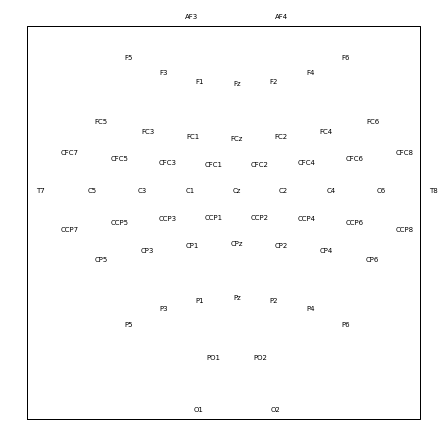

In [108]:
layout.plot();

In [109]:
event_id = dict(left = -1, right = 1)

In [110]:
# Create an event matrix: events with alternating event codes
eventLength = Y.shape[0]
ev = [i*sfreq*3 for i in range(eventLength)]

events = np.column_stack((np.array(ev,  dtype = int),
                          np.zeros(eventLength,  dtype = int),
                          np.array(Y,  dtype = int)))

In [112]:
events

array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

In [113]:
# The time window (in samples) to extract for each trial, here 0.5 -- 2.5 seconds
tmin = 0.5                

# Create the :class:`mne.EpochsArray` object
epochs = mne.EpochsArray(data, info, events, tmin, event_id)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


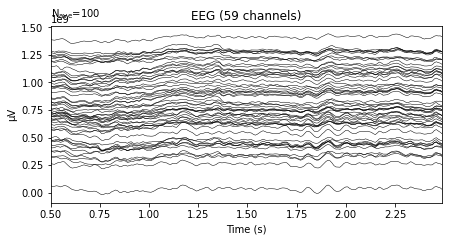

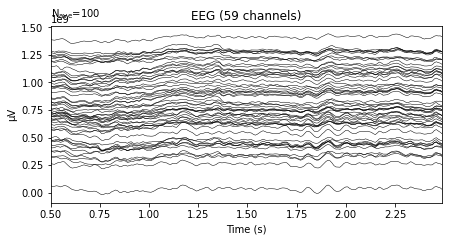

In [114]:
epochs['left'].average().plot()

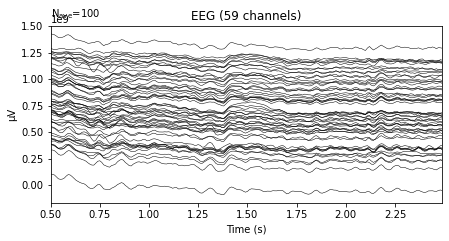

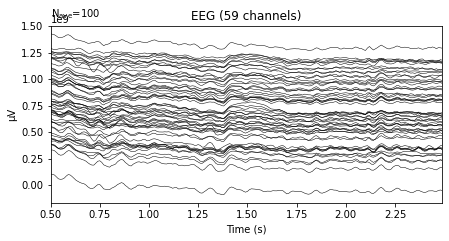

In [115]:
epochs['right'].average().plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


<ipython-input-116-697022bd73f1>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd()


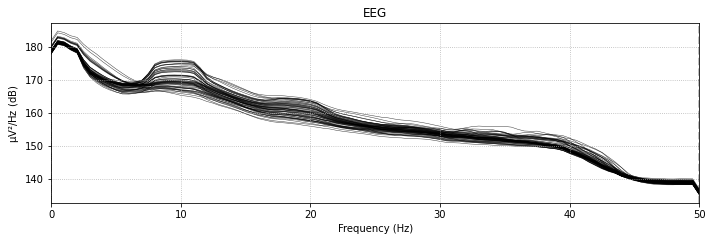

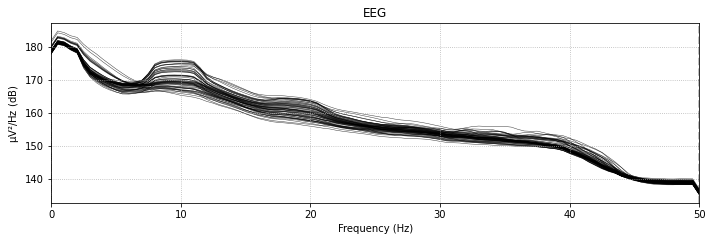

In [116]:
epochs.plot_psd()

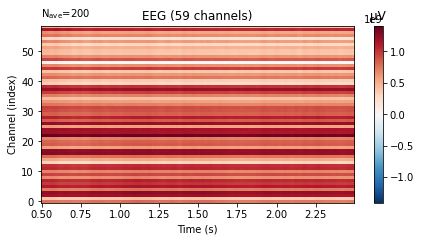

In [117]:
epochs.average().plot_image();

In [119]:
epochs.filter(l_freq=8, h_freq=32)

Setting up band-pass filter from 8 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 165 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 11800 out of 11800 | elapsed:    3.2s finished


Number of events,200
Events,left: 100right: 100
Time range,0.500 – 2.490 sec
Baseline,off


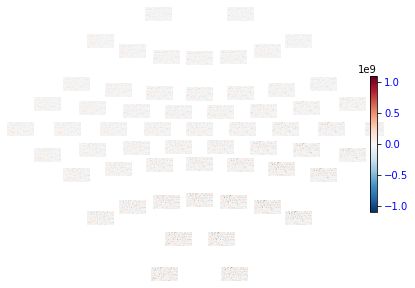

In [120]:
epochs.plot_topo_image(layout=layout, 
                       fig_facecolor='w', font_color='b');

In [121]:
print(m['cnt'])

[[  -3   -3   -3 ...    2    7    5]
 [ -25  -21  -26 ...   19   60   45]
 [ -34  -15  -52 ...   37  130   98]
 ...
 [2524 2672 2347 ... 1167 1620 1205]
 [2561 2706 2385 ... 1249 1693 1210]
 [2606 2759 2457 ... 1366 1838 1263]]


In [122]:
cnt_list1 = np.array(m['cnt']).T

In [123]:
cnt_list1.shape

(59, 190594)

In [124]:
cnt_list1[:,1]

array([-25, -21, -26, -63, -26, -38, -28,  12,  10, -43, -79,  -5, -87,
       -11, -64,   0, -59,  24,  -1,   1, -96, -34,  33,  -9, 316,  39,
       -19,  -9, -59, -55,  27,   1,  84,   8,  13,   3, -30, -45,   6,
       -39,  64,   9,   8, -13,   8, -23,  18,  62,  56,  14,   8,   7,
         5, -21,  51,  59,  19,  60,  45], dtype=int16)

In [125]:
cnt_list1[3].shape

(190594,)

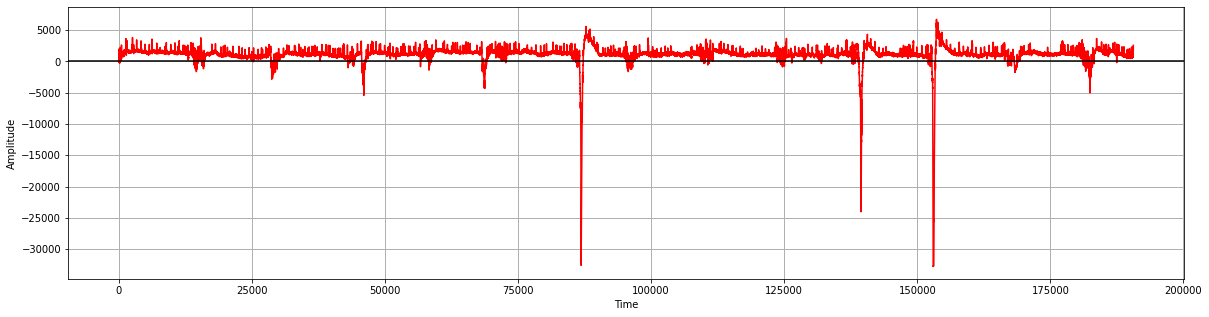

In [127]:
t = np.arange(0, 190594)
plt.figure(figsize = (20, 5))
plt.plot(t, cnt_list1[3], 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(linewidth = 1)
plt.axhline(0, c="black")
plt.show();

In [128]:
t.shape

(190594,)

In [129]:
mrk_list1 = np.array(m['mrk'])
mrk_list1

array([[(array([[  2091,   2891,   3691,   4491,   5291,   6091,   6891,   7692,
                  8492,   9292,  10092,  10892,  11692,  12492,  13292,  16294,
                 17094,  17894,  18694,  19494,  20294,  21094,  21894,  22694,
                 23494,  24294,  25094,  25894,  26694,  27494,  30495,  31295,
                 32095,  32895,  33695,  34495,  35295,  36095,  36895,  37695,
                 38495,  39295,  40095,  40895,  41695,  44696,  45496,  46296,
                 47096,  47896,  48696,  49496,  50296,  51096,  51896,  52696,
                 53496,  54296,  55096,  55896,  58895,  59695,  60495,  61295,
                 62095,  62895,  63695,  64495,  65295,  66095,  66895,  67695,
                 68495,  69295,  70095,  73094,  73894,  74694,  75495,  76295,
                 77095,  77895,  78695,  79495,  80295,  81095,  81895,  82695,
                 83495,  84295,  87294,  88094,  88894,  89694,  90494,  91294,
                 92094,  92894,  93694,

In [130]:
pos_list1 = np.array(mrk_list1[0][0][0][0])
pos_list1.shape
pos_list1

array([  2091,   2891,   3691,   4491,   5291,   6091,   6891,   7692,
         8492,   9292,  10092,  10892,  11692,  12492,  13292,  16294,
        17094,  17894,  18694,  19494,  20294,  21094,  21894,  22694,
        23494,  24294,  25094,  25894,  26694,  27494,  30495,  31295,
        32095,  32895,  33695,  34495,  35295,  36095,  36895,  37695,
        38495,  39295,  40095,  40895,  41695,  44696,  45496,  46296,
        47096,  47896,  48696,  49496,  50296,  51096,  51896,  52696,
        53496,  54296,  55096,  55896,  58895,  59695,  60495,  61295,
        62095,  62895,  63695,  64495,  65295,  66095,  66895,  67695,
        68495,  69295,  70095,  73094,  73894,  74694,  75495,  76295,
        77095,  77895,  78695,  79495,  80295,  81095,  81895,  82695,
        83495,  84295,  87294,  88094,  88894,  89694,  90494,  91294,
        92094,  92894,  93694,  94494,  97385,  98185,  98985,  99785,
       100585, 101385, 102185, 102985, 103785, 104585, 105385, 106185,
      

In [131]:
tar_list1 = np.array(mrk_list1[0][0][1][0])
tar_list1.shape
tar_list1

array([ 1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1], dtype=int16)

In [132]:
tar_list1[tar_list1 == -1] = 0
tar_list1

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1], dtype=int16)

In [133]:
cnt_list1[:,pos_list1[199]:]

array([[ 296,  397,  427, ..., 2524, 2561, 2606],
       [  18,   84,   85, ..., 2672, 2706, 2759],
       [ 704,  807,  843, ..., 2347, 2385, 2457],
       ...,
       [ 464,  486,  343, ..., 1167, 1249, 1366],
       [ 857,  911,  780, ..., 1620, 1693, 1838],
       [ 320,  346,  195, ..., 1205, 1210, 1263]], dtype=int16)

# **Trails**

In [134]:
trials_list1 = []

for i in range(len(pos_list1)-1):
  trial = cnt_list1[:,pos_list1[i]:pos_list1[i+1]]
  if trial.shape[1] != 800 :
    trial = trial[:,:800]
  trials_list1.append(trial)
trial = cnt_list1[:,pos_list1[i+1]:]
if trial.shape[1] != 800 :
    trial = trial[:,:800]
trials_list1.append(trial)
trials_list1[199].shape

(59, 800)

In [135]:
trials_list1[199] = np.delete(trials_list1[198], np.s_[800:], 1)

In [136]:
trials_list1[199].shape

(59, 800)

In [137]:
for i in range(len(trials_list1)):
  print(i , ':' , trials_list1[i].shape)

0 : (59, 800)
1 : (59, 800)
2 : (59, 800)
3 : (59, 800)
4 : (59, 800)
5 : (59, 800)
6 : (59, 800)
7 : (59, 800)
8 : (59, 800)
9 : (59, 800)
10 : (59, 800)
11 : (59, 800)
12 : (59, 800)
13 : (59, 800)
14 : (59, 800)
15 : (59, 800)
16 : (59, 800)
17 : (59, 800)
18 : (59, 800)
19 : (59, 800)
20 : (59, 800)
21 : (59, 800)
22 : (59, 800)
23 : (59, 800)
24 : (59, 800)
25 : (59, 800)
26 : (59, 800)
27 : (59, 800)
28 : (59, 800)
29 : (59, 800)
30 : (59, 800)
31 : (59, 800)
32 : (59, 800)
33 : (59, 800)
34 : (59, 800)
35 : (59, 800)
36 : (59, 800)
37 : (59, 800)
38 : (59, 800)
39 : (59, 800)
40 : (59, 800)
41 : (59, 800)
42 : (59, 800)
43 : (59, 800)
44 : (59, 800)
45 : (59, 800)
46 : (59, 800)
47 : (59, 800)
48 : (59, 800)
49 : (59, 800)
50 : (59, 800)
51 : (59, 800)
52 : (59, 800)
53 : (59, 800)
54 : (59, 800)
55 : (59, 800)
56 : (59, 800)
57 : (59, 800)
58 : (59, 800)
59 : (59, 800)
60 : (59, 800)
61 : (59, 800)
62 : (59, 800)
63 : (59, 800)
64 : (59, 800)
65 : (59, 800)
66 : (59, 800)
67 : 

In [138]:
trials_list1[0]

array([[ 988, 1052, 1052, ..., 1033,  961,  999],
       [ 471,  495,  466, ...,  537,  501,  531],
       [1059, 1164, 1166, ..., 1321, 1194, 1254],
       ...,
       [1029, 1181, 1194, ..., 1037,  974, 1040],
       [1217, 1388, 1417, ..., 1373, 1284, 1337],
       [ 858, 1025, 1061, ...,  900,  849,  920]], dtype=int16)

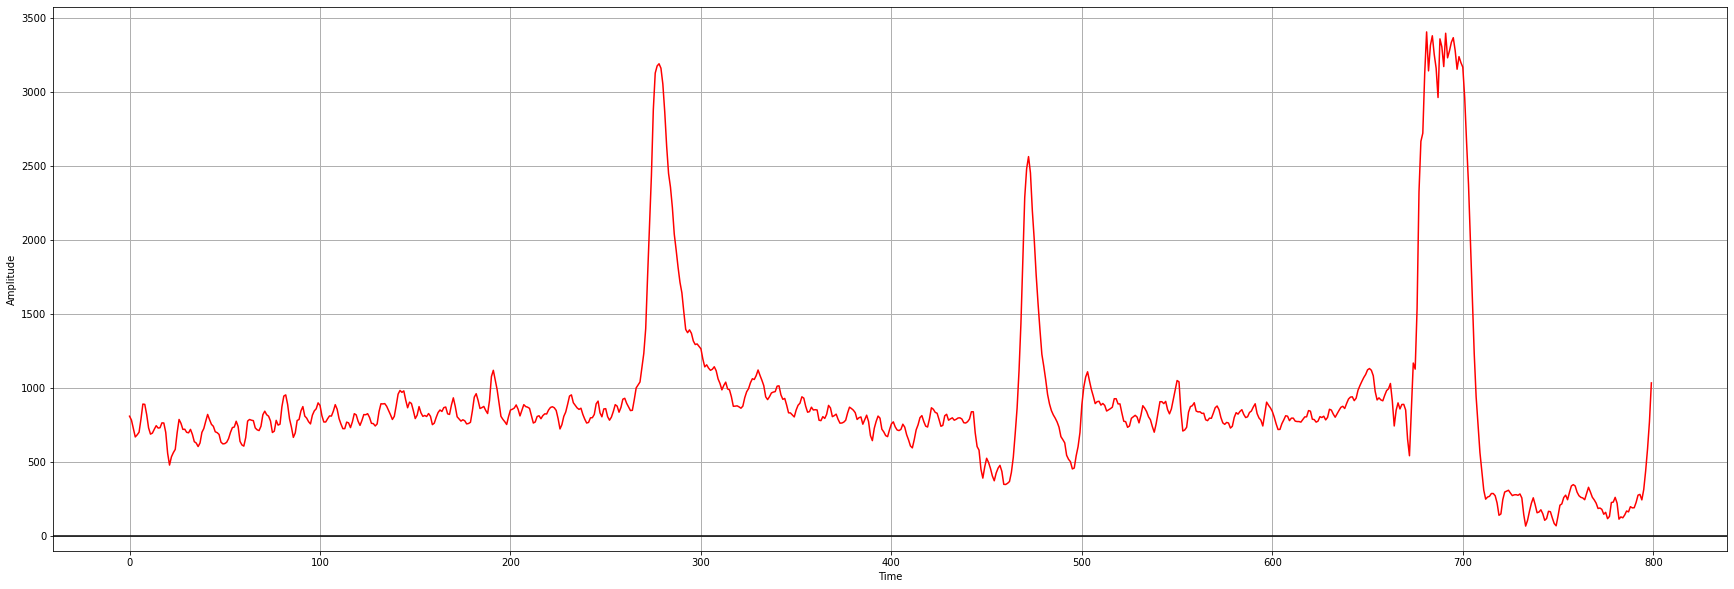

In [139]:
t = np.arange(0, len(trials_list1[14][0]))
plt.figure(figsize = (30, 10))
plt.plot(t, trials_list1[14][0], 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(linewidth = 1)
plt.axhline(0, c="black")
plt.show();

In [140]:
trials_list1 = np.array(trials_list1)
trials_list1.shape

(200, 59, 800)

# Cross Validation 

In [141]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

model = 1
# displaying indices for the rows that will be for training/testing
for train, test in kfold.split(trials_list1):
  print('Model #%d:' % model)
  print('train: %s ****** test: %s'  % (train,  test),'***************' )
  model= model+1

Model #1:
train: [  0   1   2   3   5   6   7   8   9  10  12  13  14  15  17  19  20  21
  22  23  24  25  26  30  32  33  36  37  39  41  42  43  45  46  48  49
  50  52  53  54  55  56  57  60  61  62  63  64  65  66  67  68  70  71
  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  90  91
  92  93  96  98  99 100 101 103 104 105 106 107 108 109 111 112 113 114
 115 116 117 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 160 161 163 164 166 167 169 170 173 175 178 179
 180 181 182 183 185 186 187 188 189 190 191 192 195 196 197 199] ****** test: [  4  11  16  18  27  28  29  31  34  35  38  40  44  47  51  58  59  69
  73  89  94  95  97 102 110 118 136 159 162 165 168 171 172 174 176 177
 184 193 194 198] ***************
Model #2:
train: [  0   1   2   3   4   6   7   8   9  10  11  13  15  16  18  20  21  22
  23  24  25  26  27  28  29  30  31  32  34  35  

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten , Activation , concatenate, Input,  LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
import tensorflow as tf
import keras

In [143]:
inputs = tf.keras.Input(shape=(59,800))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

#Dense2 = Dense(128, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense1)
#Dense3 = Dense(256, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense2)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

#Dense_1 = Dense(256, activation = 'relu')(flat)

Dense_2 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 59, 800)]         0         
                                                                 
 dense_3 (Dense)             (None, 59, 64)            51264     
                                                                 
 bidirectional_2 (Bidirectio  (None, 59, 512)          657408    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 59, 512)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 59, 256)          656384    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 59, 256)           0   

In [144]:
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])

In [146]:
history = model.fit(trials_list1,tar_list1,epochs=20,batch_size=4,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 22s 534ms/step - loss: 1.8318 - accuracy: 0.4812 - val_loss: 2.1500 - val_accuracy: 0.3750
Epoch 2/20
40/40 [==============================] - 18s 453ms/step - loss: 1.7619 - accuracy: 0.5562 - val_loss: 2.1636 - val_accuracy: 0.6000
Epoch 3/20
40/40 [==============================] - 18s 457ms/step - loss: 1.7186 - accuracy: 0.4938 - val_loss: 2.1165 - val_accuracy: 0.4000
Epoch 4/20
40/40 [==============================] - 20s 491ms/step - loss: 1.6745 - accuracy: 0.5188 - val_loss: 1.7274 - val_accuracy: 0.4250
Epoch 5/20
40/40 [==============================] - 18s 446ms/step - loss: 1.5811 - accuracy: 0.5188 - val_loss: 1.6464 - val_accuracy: 0.4250
Epoch 6/20
40/40 [==============================] - 19s 469ms/step - loss: 1.5146 - accuracy: 0.5188 - val_loss: 1.6025 - val_accuracy: 0.4250
Epoch 7/20
40/40 [==============================] - 18s 448ms/step - loss: 1.4482 - accuracy: 0.5250 - val_loss: 1.6038 - val_accuracy: 0.4250